In [ ]:
from datasets import load_dataset,  ClassLabel
import torch
import torchvision.transforms.v2 as T
from classes import i2d
from fastai.vision.all import *

In [ ]:
ds = load_dataset("zh-plus/tiny-imagenet", split="train", trust_remote_code=True)

In [ ]:
ds._info.features['label'] = ClassLabel(names = list(map(i2d.get,ds.features['label'].names)))

In [ ]:
cat = ds.features['label'].str2int('tabby, tabby cat')
fish = ds.features['label'].str2int('goldfish, Carassius auratus')

In [ ]:
ds2 = ds.filter(lambda x: x['label'] == fish)
ds = ds.filter(lambda x: x['label'] == cat)

In [ ]:
tfmx = T.Compose([T.ToImage(),
                  T.ToDtype(torch.float32, scale=True), 
                  lambda x: x.expand(3,-1,-1)])
ds.set_transform(lambda x: {'image':[tfmx(img) for img in x['image']]})
ds2.set_transform(lambda x: {'image':[tfmx(img) for img in x['image']]})

In [ ]:
x = torch.stack(ds[:]['image'])
x2 = torch.stack(ds2[:]['image'])

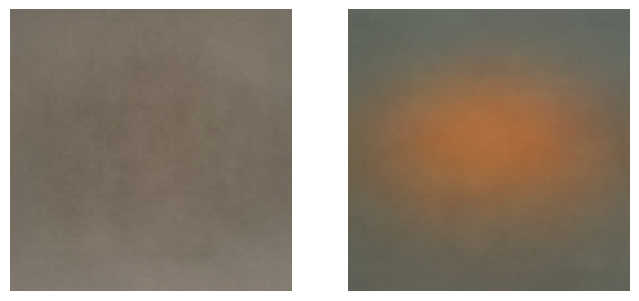

In [ ]:
show_images([x.mean(0), x2.mean(0)],figsize=(8,4))